# Machine Learning Model Serving

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
import time
start = time.time()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [17]:
def save_obj(obj, name ):
    with open('web/'+ name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [18]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [19]:
data.head()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,2011,2011-03-27,18,11,18,1977-05-10,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nick Heidfeld,12374,0,0,0,1
1,2010,2010-03-28,9,1,9,1984-12-07,Pol,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Robert Kubica,9242,0,0,0,0
2,2017,2017-03-26,11,11,12,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,10812,0,0,0,1
3,2018,2018-03-25,7,1,8,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11176,0,0,0,0
4,2019,2019-03-17,11,11,11,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11533,0,0,0,1


In [20]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [21]:
driver_confidence_dict_str = {}
for key , value in driver_confidence_dict.items():
    driver_confidence_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))
    
save_obj(driver_confidence_dict_str, 'driver_dict' )

In [32]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
print(dnf_by_constructor)

constructor
Alfa Romeo        258
AlphaTauri        233
Alpine F1         196
Alpine F1 Team     11
Aston Martin      173
Caterham           92
Ferrari            54
HRT                97
Haas F1 Team      142
Lotus              70
Manor Marussia     58
Marussia           90
McLaren           174
Mercedes           52
Red Bull           75
Virgin             69
Williams          233
Name: constructor_dnf, dtype: int64


In [33]:
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
print(constructor_race_entered)

constructor
Alfa Romeo        446
AlphaTauri        447
Alpine F1         426
Alpine F1 Team     20
Aston Martin      449
Caterham          112
Ferrari           450
HRT               115
Haas F1 Team      219
Lotus              76
Manor Marussia     66
Marussia          108
McLaren           447
Mercedes          449
Red Bull          448
Virgin             76
Williams          449
Name: constructor_dnf, dtype: int64


In [22]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [23]:
constructor_reliability_dict_str = {}
for key , value in constructor_reliability_dict.items():
    constructor_reliability_dict_str[key] = np. array([value])
    #print ("%s: %s" % (key, value))
    
save_obj(constructor_reliability_dict_str, 'constructor_dict' )

# Machine Learning Model Serving

In [24]:
import pickle

model_filepath='./models/{}.pkl'.format('RandomForestClassifier')

# load model using pickle l from disk
print('Loading model ...\n    MODEL: {}'.format(model_filepath))
loaded_model = pickle.load(open(model_filepath, 'rb'))
# model = joblib.load(model_filepath)


Loading model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [25]:
importances = loaded_model.feature_importances_
importances

array([0.07491882, 0.71406438, 0.03994287, 0.04453907, 0.06111562,
       0.06541924])

In [26]:
feature_names=['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_relaiblity']

In [27]:
import time
import numpy as np

start_time = time.time()
std = np.std([
    tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.062 seconds


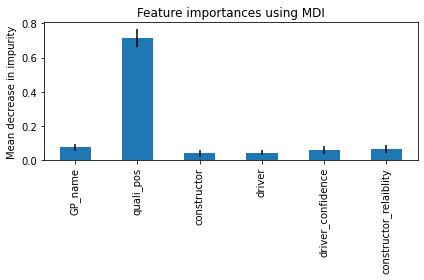

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [29]:
end = time.time()

In [30]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:00:01.383012'

In [31]:
print(str(end - start)+" seconds")

1.383011817932129 seconds
